In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df_selec=pd.read_csv("df_selec.csv")

In [3]:
df_final=pd.read_csv("df_final.csv")

C:\Users\Anne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,171,194,229) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# On repart de df_selec avant traitement des nan et encodage  
# Rajout des variables supprimées en NB 3 pq elles gênaient la modélisation

df_selec_add=df_final[["idmutation","qty_of_mut", "datemut", "anneemut","moismut","etaban_lot"]]



In [5]:
df_selec_add.isna().sum()

idmutation    0
qty_of_mut    0
datemut       0
anneemut      0
moismut       0
etaban_lot    0
dtype: int64

In [6]:
df_selec=df_selec.merge(df_selec_add, on="idmutation")

In [7]:
df_selec.head()

,idmutation,y,idnatmut,libnatmut,vefa,valeurfonc,nblot,nbcomm,l_codinsee,nblocapt,...,baie_orientation_nord,baie_orientation_ouest,baie_orientation_est,baie_orientation_autre,Commerces_bruyants,qty_of_mut,datemut,anneemut,moismut,etaban_lot
0,7819809,0,1,Vente,f,370000.0,1,1,75101,1,...,0,0,0,0,1,1,2021-06-04,2021,6,75101_4901_00019_93
1,7819819,0,1,Vente,f,682000.0,2,1,75111,1,...,0,1,0,0,1,1,2021-11-25,2021,11,75111_1383_00005_8057
2,7819821,0,1,Vente,f,451000.0,1,1,75117,1,...,1,0,0,0,0,1,2021-03-18,2021,3,75117_5503_00103_24
3,7819822,0,1,Vente,f,433000.0,3,1,75115,1,...,1,0,0,0,0,1,2021-11-12,2021,11,75115_2521_00008_19
4,7819824,1,1,Vente,f,561076.0,1,1,75118,1,...,1,0,0,0,1,2,2021-01-08,2021,1,75118_2113_00110_19


In [8]:
# Idmutation en index
df_selec.set_index("idmutation", inplace=True)

In [9]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114072 entries, 7819809 to 8843184
Data columns (total 53 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   y                                            114072 non-null  int64  
 1   idnatmut                                     114072 non-null  int64  
 2   libnatmut                                    114072 non-null  object 
 3   vefa                                         114072 non-null  object 
 4   valeurfonc                                   114033 non-null  float64
 5   nblot                                        114072 non-null  int64  
 6   nbcomm                                       114072 non-null  int64  
 7   l_codinsee                                   114072 non-null  int64  
 8   nblocapt                                     114072 non-null  int64  
 9   nblocdep                                     114072 

In [10]:
# Grosse proportion de Nan dans les variables issues du CSTB (voir démonstration en fin de NB1)=>
# Cette forte proportion de Nan est due au fichier d'origine CSTB. Pas de perte due aux merge ou autre

# Les variables "anarnc202012_nb_log ", "anarnc202012_nb_lot_garpark", "anarnc202012_nb_lot_tertiaire"...
#..."anarnc202012_nb_lot_tot" ont le même nombre de Nan. 
# On fait le pari qu'en supprimant les lignes Nan en colonne "anarnc202012_nb_log...
#... les Nan vont aussi disparaitre ou réduire drastiquement dans les autres colonnes CSTB

df_selec=df_selec.dropna(subset=["anarnc202012_nb_log"])

In [11]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105340 entries, 7819809 to 8843172
Data columns (total 53 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   y                                            105340 non-null  int64  
 1   idnatmut                                     105340 non-null  int64  
 2   libnatmut                                    105340 non-null  object 
 3   vefa                                         105340 non-null  object 
 4   valeurfonc                                   105304 non-null  float64
 5   nblot                                        105340 non-null  int64  
 6   nbcomm                                       105340 non-null  int64  
 7   l_codinsee                                   105340 non-null  int64  
 8   nblocapt                                     105340 non-null  int64  
 9   nblocdep                                     105340 

In [12]:
df_selec["y"].value_counts()

0    85650
1    19690
Name: y, dtype: int64

In [13]:
# Pari réussi. On part là dessus...

In [14]:
# Renommer la variable cible pour être plus explicite en DataViz

df_selec=df_selec.rename({"y":"Revente >1"}, axis=1)
df_selec["Revente >1"]

idmutation
7819809    0
7819821    0
7819822    0
7819824    1
8563148    1
          ..
8843161    0
8843163    0
8843166    0
8843171    0
8843172    0
Name: Revente >1, Length: 105340, dtype: int64

In [15]:
# Analyse de la variable "Revente >1"

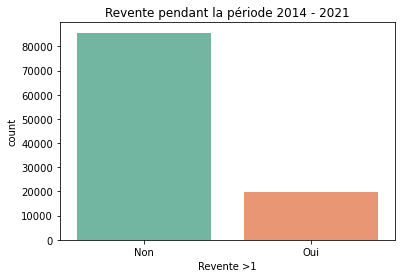

In [16]:
g=sns.countplot(x="Revente >1", data=df_selec, palette="Set2")
g.set_xticklabels(["Non", "Oui"])
plt.title('Revente pendant la période 2014 - 2021');

In [17]:
# ANALYSE DE LA VARIABLE "idnatmut" =>  identifiant de clef primaire de la table ann_nature_mutation (1=vente - 2 = vefa)

df_selec["idnatmut"].value_counts(ascending=False)

1    105206
2       134
Name: idnatmut, dtype: int64

In [18]:
# ANALYSE DE LA VARIABLE "libnatmut" => libellé de la nature de mutation 

df_selec["libnatmut"].value_counts()

Vente                                 105206
Vente en l'état futur d'achèvement       134
Name: libnatmut, dtype: int64

In [19]:
# ANALYSE DE LA VARIABLE "vefa" => vrai si la mutation est une Vente en l'état futur d'achèvement (VEFA)

df_selec["vefa"].value_counts()

f    105206
t       134
Name: vefa, dtype: int64

In [20]:
# Redondance de ces 3 variables. Suppression de "idnatmut" et "vefa"

df_selec=df_selec.drop(["vefa", "idnatmut"], axis=1)


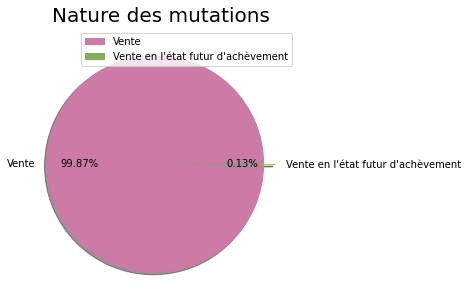

In [21]:
plt.figure(figsize=(5,5))
x=df_selec["libnatmut"].value_counts()
labels=df_selec["libnatmut"].value_counts().index
plt.pie(x, labels=labels, 
        colors=["#cc7ba6", "#84ae57"], 
        explode=[0.05,0.05], 
        autopct=lambda x : str(round(x,2))+ "%", 
        pctdistance=0.7, 
        shadow=True)
plt.title("Nature des mutations", fontsize=20)
plt.legend(loc="best");

In [22]:
# ANALYSE DE LA VARIABLE "valeurfonc" => prix ou évaluation déclarée dans le cadre d'une mutation onéreuse


In [23]:
pd.set_option('float_format', '{:f}'.format)
df_selec["valeurfonc"].describe()

count    105304.000000
mean     461395.083071
std      261237.367617
min           0.000000
25%      298000.000000
50%      406000.000000
75%      560000.000000
max     7650000.000000
Name: valeurfonc, dtype: float64

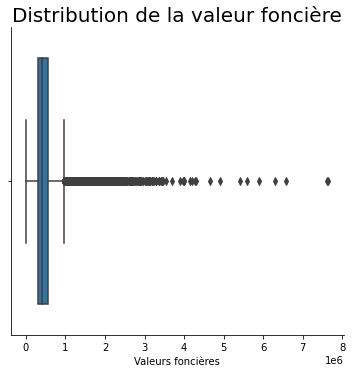

In [24]:
g=sns.catplot(x="valeurfonc", kind="box", data=df_selec)
plt.title("Distribution de la valeur foncière", fontsize=20)
plt.xlabel('Valeurs foncières');



In [25]:
df_selec[df_selec["valeurfonc"]<1000].shape

(41, 51)

In [26]:
df_selec[df_selec["valeurfonc"]>3500000].shape

(19, 51)

In [27]:
# Suppression des valeurs aberrantes
df_selec=df_selec[(df_selec["valeurfonc"]>1000)&(df_selec["valeurfonc"]<3500000)]

In [28]:
pd.set_option('float_format', '{:f}'.format)
df_selec["valeurfonc"].describe()

count    105240.000000
mean     460776.174381
std      253419.185406
min        1001.000000
25%      298000.000000
50%      406093.500000
75%      560000.000000
max     3455000.000000
Name: valeurfonc, dtype: float64

In [29]:
df_selec["cat_valeur"]=pd.cut(df_selec["valeurfonc"], 
bins=[0, 320000, 436600, 600000,3455000], 
labels=["<320k€ €", "Entre 320 & 436k€ €", "Entre 436 & 600k€", ">600k€"])

C:\Users\Anne\AppData\Local\Temp/ipykernel_6248/2059702763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selec["cat_valeur"]=pd.cut(df_selec["valeurfonc"],


In [30]:
pd.crosstab(df_selec["Revente >1"], df_selec["cat_valeur"], normalize=1)

cat_valeur,<320k€ €,Entre 320 & 436k€ €,Entre 436 & 600k€,>600k€
Revente >1,,,,
0,0.828945,0.816755,0.799944,0.799130
1,0.171055,0.183245,0.200056,0.200870


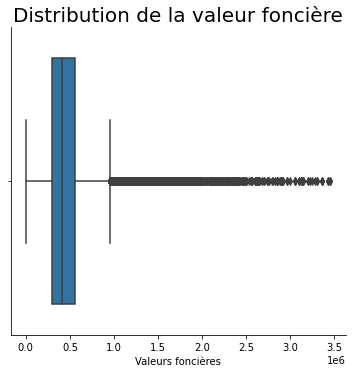

In [31]:
g=sns.catplot(x="valeurfonc", kind="box", data=df_selec)
plt.title("Distribution de la valeur foncière", fontsize=20)
plt.xlabel('Valeurs foncières');


In [32]:
# Mémo => Allure = courbe Beta 

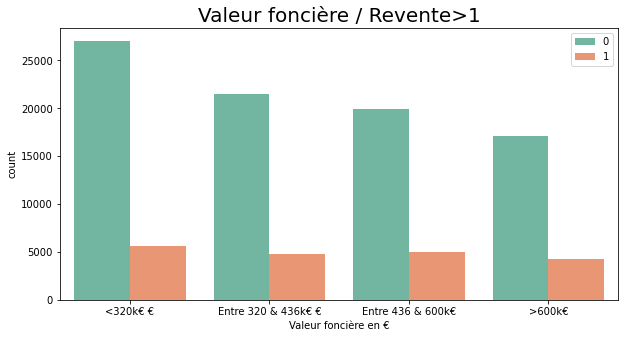

In [33]:
plt.figure(figsize=(10,5))

sns.countplot(x=df_selec["cat_valeur"], hue=df_selec["Revente >1"], palette="Set2")
plt.title("Valeur foncière / Revente>1", fontsize=20)
plt.xlabel('Valeur foncière en €')
plt.legend(loc="best");

In [34]:
g=df_selec.groupby("cat_valeur").agg({"Revente >1":"mean"})

In [35]:
list_valeur=g.index.tolist()
x_ticks=np.arange(len(g))

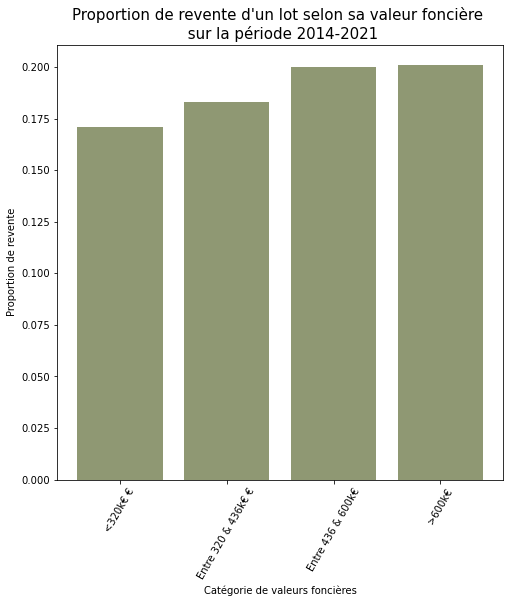

In [36]:
plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#8f9873")
plt.xticks(x_ticks, list_valeur, rotation=60)
plt.xlabel("Catégorie de valeurs foncières")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa valeur foncière \n sur la période 2014-2021", fontsize=15);

In [37]:
# ANALYSE DE LA VARIABLE "nblot" +> nombre total de lots dans la mutation
df_selec["nblot"].value_counts()


2     51764
1     36083
3     14428
4      2037
5       590
6       187
7        68
8        35
9        16
12        6
10        6
14        5
11        3
18        3
13        2
16        2
20        1
24        1
21        1
19        1
15        1
Name: nblot, dtype: int64

In [38]:
#regroupement des catégories > 10

def filtre (x) :
    if x >=10 :
        return ">10"
    else :
        return x
    
df_selec["nblot"]=df_selec["nblot"].apply(filtre)


In [39]:
df_selec["nblot"].value_counts()

2      51764
1      36083
3      14428
4       2037
5        590
6        187
7         68
8         35
>10       32
9         16
Name: nblot, dtype: int64

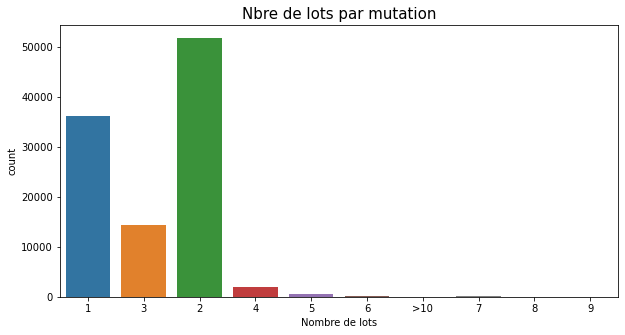

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='nblot', data=df_selec)
plt.title("Nbre de lots par mutation", fontsize=15)
plt.xlabel('Nombre de lots');


In [41]:
# ANALYSE DE LA VARIABLE "nbcomm" +> nombre de communes concernées par la mutation
df_selec["nbcomm"].value_counts()

1    105240
Name: nbcomm, dtype: int64

In [42]:
# Aucun intérêt. Suppression de cette variable

df_selec=df_selec.drop("nbcomm", axis=1)

In [43]:
# ANALYSE DE LA VARIABLE "l_codinsee" +> liste des codes INSEE des communes concernées par la mutation
df_selec["l_codinsee"].value_counts()

75118    14675
75115    10480
75117    10220
75111     9110
75120     7528
75116     7308
75119     6240
75114     6000
75112     5948
75110     5127
75113     4803
75109     3024
75105     2401
75103     2319
75107     2316
75106     1943
75108     1849
75104     1545
75102     1427
75101      977
Name: l_codinsee, dtype: int64

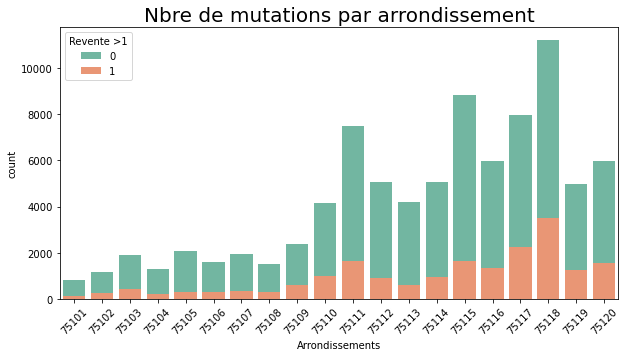

In [44]:
plt.figure(figsize=(10,5))

sns.countplot(x='l_codinsee', hue="Revente >1", data=df_selec, palette="Set2", dodge=False)
plt.title("Nbre de mutations par arrondissement", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Arrondissements');

In [45]:
df_selec["Revente >1"]=df_selec["Revente >1"].replace({"non":0, "oui":1})
g=df_selec.groupby("l_codinsee").agg({"Revente >1":"mean"})
g

,Revente >1
l_codinsee,
75101,0.151484
75102,0.191310
75103,0.183269
75104,0.146926
75105,0.129529
75106,0.163150
75107,0.161917
75108,0.175230
75109,0.208003


In [46]:
list_arrond=g.index.tolist()
x_ticks=np.arange(len(g))

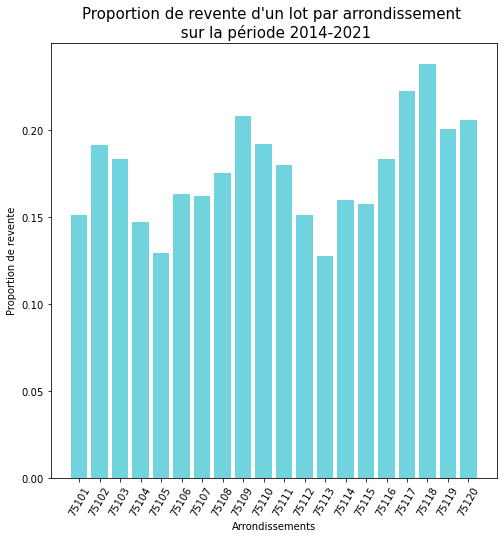

In [47]:

plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_arrond, rotation=60)
plt.xlabel("Arrondissements")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par arrondissement \n sur la période 2014-2021", fontsize=15);


In [48]:
# ANALYSE DE LA VARIABLE "nblocapt" +> nombre d'appartements ayant muté
df_selec["nblocapt"].value_counts()


1    105240
Name: nblocapt, dtype: int64

In [49]:
# Aucun intérêt. Suppression de cette variable
df_selec=df_selec.drop("nblocapt", axis=1)

In [50]:
# ANALYSE DE LA VARIABLE "nblocdep" +> nombre de dépendances ayant muté
df_selec["nblocdep"].value_counts()


0     86527
1     16921
2      1546
3       194
4        35
5         8
7         3
6         2
12        1
9         1
14        1
8         1
Name: nblocdep, dtype: int64

In [51]:
 # ANALYSE DE LA VARIABLE "nbapt2pp" +> nombre d'appartements avec 2 pièces principales ayant muté
df_selec["nbapt2pp"].value_counts()


1    63944
0    41296
Name: nbapt2pp, dtype: int64

In [52]:
df_selec["nbapt2pp"].unique()

array([1, 0], dtype=int64)

In [53]:
 # ANALYSE DE LA VARIABLE "nbapt3pp" +> nombre d'appartements avec 3 pièces principales ayant muté
df_selec["nbapt3pp"].value_counts()


0    63944
1    41296
Name: nbapt3pp, dtype: int64

In [54]:
# Pour la Viz, on va regrouper "nbapt2pp" et "nbapt3pp" => "type appart"

df_selec=df_selec.rename({"nbapt2pp":"Type appart"}, axis=1)

In [55]:
df_selec["Type appart"]

idmutation
7819809    1
7819821    1
7819822    0
7819824    1
8563148    1
          ..
8843161    1
8843163    1
8843166    1
8843171    1
8843172    1
Name: Type appart, Length: 105240, dtype: int64

In [56]:
df_selec["Type appart"]=df_selec["Type appart"].replace({0:"3P", 1:"2P"})

In [57]:
df_selec["Type appart"]

idmutation
7819809    2P
7819821    2P
7819822    3P
7819824    2P
8563148    2P
           ..
8843161    2P
8843163    2P
8843166    2P
8843171    2P
8843172    2P
Name: Type appart, Length: 105240, dtype: object

In [58]:
# Suppression de la variable "nbapt3pp"  
df_selec=df_selec.drop("nbapt3pp", axis=1)

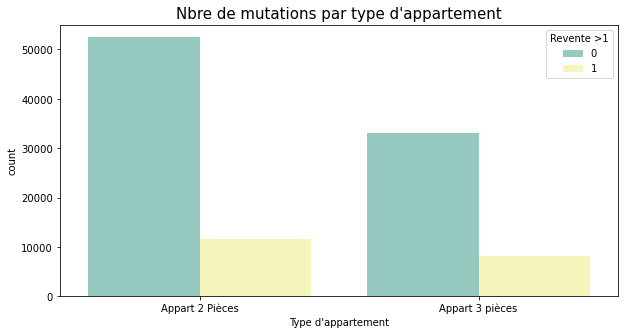

In [59]:
plt.figure(figsize=(10,5))

sns.countplot(x='Type appart', hue="Revente >1", data=df_selec, palette="Set3")
plt.title("Nbre de mutations par type d'appartement", fontsize=15)
plt.xlabel("Type d'appartement")
plt.xticks ([0,1], ["Appart 2 Pièces", "Appart 3 pièces"]);

In [60]:
g=df_selec.groupby("Type appart").agg({"Revente >1":"mean"})
g


,Revente >1
Type appart,
2P,0.180079
3P,0.197792


In [61]:
list_appart=g.index.tolist()
x_ticks=np.arange(len(g))

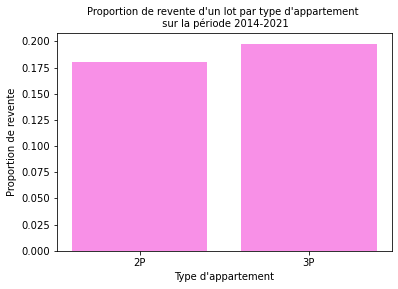

In [62]:
plt.figure()
plt.bar(range(len(g)), g["Revente >1"], color="#f890e7")
plt.xticks(x_ticks, list_appart)
plt.xlabel("Type d'appartement")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par type d'appartement \n sur la période 2014-2021", fontsize=10);

In [63]:
# ANALYSE DE LA VARIABLE "sbati" +> surface de l'ensemble du bâti ayant muté
df_selec["sbati"].value_counts()


40     3891
30     3520
50     3464
35     3278
45     3262
       ... 
220       1
190       1
166       1
350       1
214       1
Name: sbati, Length: 191, dtype: int64

In [64]:
# ANALYSE DE LA VARIABLE "sbatapt" +> surface de l'ensemble du bâti ayant muté
df_selec["sbatapt"].value_counts()


40     3891
30     3520
50     3464
35     3278
45     3262
       ... 
220       1
190       1
166       1
350       1
214       1
Name: sbatapt, Length: 191, dtype: int64

In [65]:
# Ces 2 variables donnent les mêmes infos. Suppression de l'une
df_selec=df_selec.drop("sbati", axis=1)

In [66]:
# ANALYSE DE LA VARIABLE "sbatact" +> surface de l'ensemble du bâti ayant muté
df_selec["sbatact"].value_counts()


0    105240
Name: sbatact, dtype: int64

In [67]:
# Pas d'intérêt => suppression
df_selec=df_selec.drop("sbatact", axis=1)

In [68]:
# ANALYSE DE LA VARIABLE "sapt2pp" +> surface de l'ensemble du bâti ayant muté
df_selec["sapt2pp"].value_counts()


0      41296
30      3360
40      3075
35      2986
32      2466
       ...  
195        1
175        1
131        1
135        1
214        1
Name: sapt2pp, Length: 150, dtype: int64

In [69]:
# ANALYSE DE LA VARIABLE "sapt3pp" +> surface de l'ensemble du bâti ayant muté
df_selec["sapt3pp"].value_counts()

0      63944
60      1715
50      1551
70      1376
55      1348
       ...  
220        1
350        1
175        1
166        1
234        1
Name: sapt3pp, Length: 179, dtype: int64

In [70]:
# Addition des 2 variables
df_selec["surface_appart"]=df_selec["sapt2pp"]+df_selec["sapt3pp"]

In [71]:
#Comparaison "surface_appart" et "sbatapt"

compar=df_selec["surface_appart"]-df_selec["sbatapt"]
compar.sum()

0

In [72]:
#Suppression de "sbatapt", "sapt2pp", "sapt3pp"
df_selec=df_selec.drop("sbatapt", axis=1)
df_selec=df_selec.drop("sapt2pp", axis=1)
df_selec=df_selec.drop("sapt3pp", axis=1)

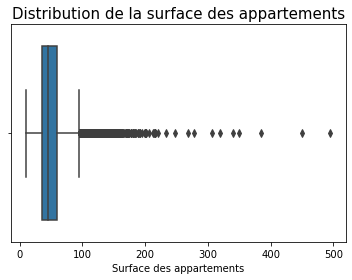

In [73]:
sns.boxplot(x="surface_appart", data=df_selec)
plt.title("Distribution de la surface des appartements", fontsize=15)
plt.xlabel('Surface des appartements');

In [74]:
df_selec[df_selec["surface_appart"]>220].shape

(11, 45)

In [75]:
# Suppression valeurs aberrantes
df_selec=df_selec[df_selec["surface_appart"]<220]


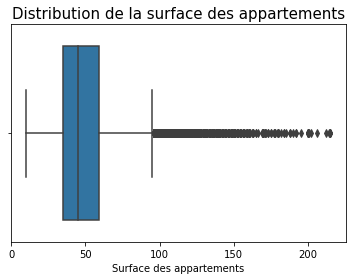

In [76]:
sns.boxplot(x="surface_appart", data=df_selec)
plt.title("Distribution de la surface des appartements", fontsize=15)
plt.xlabel('Surface des appartements');

In [77]:
# ANALYSE DE LA VARIABLE "scarrez" +> Surface Loi Carrez du lot
df_selec["scarrez"].describe()



count   105228.000000
mean        48.641474
std         45.672267
min          0.000000
25%         34.440000
50%         45.310000
75%         58.850000
max       7392.000000
Name: scarrez, dtype: float64

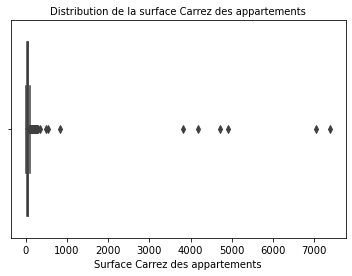

In [78]:
sns.boxplot(x = 'scarrez', data = df_selec)
plt.title("Distribution de la surface Carrez des appartements", fontsize=10)
plt.xlabel('Surface Carrez des appartements');

In [79]:
df_selec[df_selec["scarrez"]==0].shape

(24, 45)

In [80]:
df_selec[df_selec["scarrez"]>220].shape

(19, 45)

In [81]:
#Suppression des valeurs aberrantes

In [82]:
df_selec=df_selec[(df_selec["scarrez"]>0)&(df_selec["scarrez"]<220)]

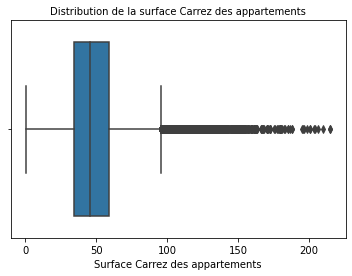

In [83]:
sns.boxplot(x = 'scarrez', data = df_selec)
plt.title("Distribution de la surface Carrez des appartements", fontsize=10)
plt.xlabel('Surface Carrez des appartements');

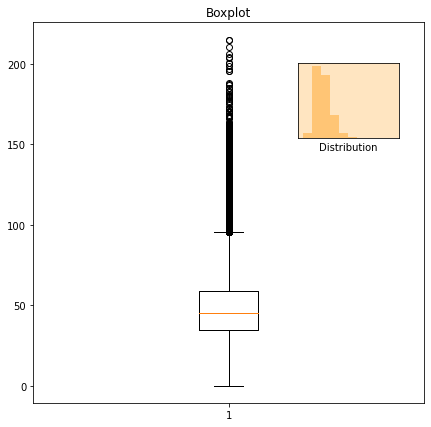

In [84]:
plt.figure(figsize = (7,7))
plt.boxplot(df_selec["scarrez"])
plt.title( 'Boxplot')
plt.axes([0.65, 0.65, 0.2, 0.15], facecolor='#ffe5c1')
plt.hist(df_selec["scarrez"], color='#FFC575')
plt.xlabel('Distribution')
plt.xticks([])
plt.yticks([]);

In [85]:
# Chercher un moyen de représenter la différence entre surface appart et scarrez !!!!!!!!!!!!!!
# Soit regarder la différence entre les 2 soit le rapport
# Faire un graph avec les axes scatterplot avec x = scarrez, y=surface, et y'= scarrez pour avoir la ligne "identité" qui sera une diagonale. 

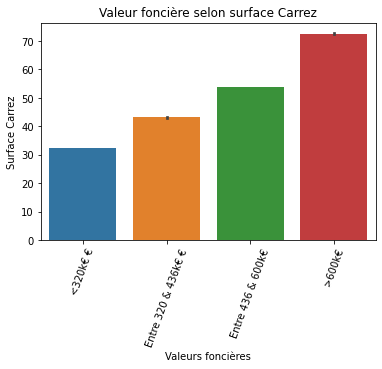

In [86]:
sns.barplot(x = df_selec["cat_valeur"], y = df_selec["scarrez"])
plt.title("Valeur foncière selon surface Carrez")
plt.xticks(rotation=70)
plt.xlabel("Valeurs foncières")
plt.ylabel("Surface Carrez");

In [87]:
# Il vaut mieux faire un scatter plot pour avoir la tendance

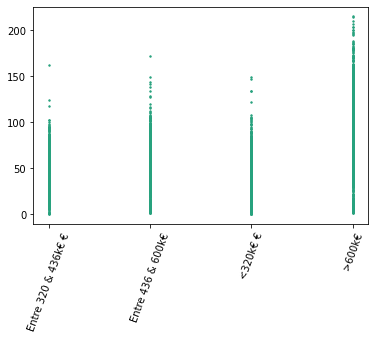

In [88]:
plt.figure()
plt.scatter(x=df_selec["cat_valeur"], y=df_selec["scarrez"], color="#28a27e", s=2)
plt.xticks(rotation=70);


In [89]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_log"=> Nombre de logements dans le bâtiment
df_selec["anarnc202012_nb_log"].describe()



count   105185.000000
mean       109.684169
std        363.545874
min          0.000000
25%         18.000000
50%         30.000000
75%         61.000000
max       4791.000000
Name: anarnc202012_nb_log, dtype: float64

In [90]:
df_selec["anarnc202012_nb_log"].isna().sum()

0

In [91]:
df_selec["anarnc202012_nb_log"].median()

30.0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


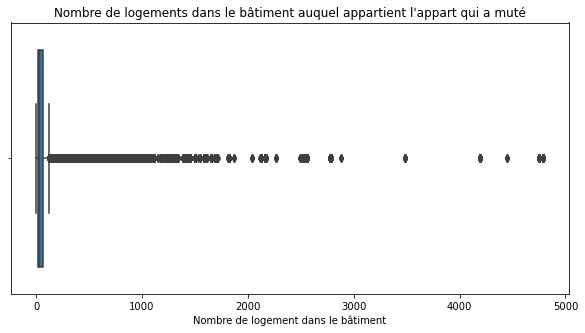

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_log"])
plt.title("Nombre de logements dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de logement dans le bâtiment");

In [93]:
df_selec[df_selec["anarnc202012_nb_log"]==0].shape

(1254, 45)

In [94]:
df_selec[df_selec["anarnc202012_nb_log"]==1].shape

(124, 45)

In [95]:
df_selec[(df_selec["anarnc202012_nb_log"]>1) & (df_selec["anarnc202012_nb_log"]<100)].median()

C:\Users\Anne\AppData\Local\Temp/ipykernel_6248/1496971302.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_selec[(df_selec["anarnc202012_nb_log"]>1) & (df_selec["anarnc202012_nb_log"]<100)].median()


Revente >1                                                   0.000000
valeurfonc                                              400000.000000
l_codinsee                                               75115.000000
nblocdep                                                     0.000000
scarrez                                                     43.825000
anarnc202012_nb_log                                         26.000000
anarnc202012_nb_lot_garpark                                  0.000000
anarnc202012_nb_lot_tertiaire                               25.000000
anarnc202012_nb_lot_tot                                     45.000000
adedpe202006_logtype_enr                                     0.000000
adedpe202006_logtype_perc_surf_vitree_ext                    0.249000
adedpe202006_logtype_presence_balcon                         0.000000
adedpe202006_logtype_presence_climatisation                  0.000000
ancqpv201410_is_qpv                                          0.000000
cerffo2020_nb_log   

In [96]:
df_selec[(df_selec["anarnc202012_nb_log"]>0) & (df_selec["anarnc202012_nb_log"]<1)].shape

(98, 45)

In [97]:
df_selec[df_selec["anarnc202012_nb_log"]>2500].shape

(755, 45)

In [98]:
# Suppression des valeurs aberrantes
df_selec=df_selec[(df_selec["anarnc202012_nb_log"]>=1)&(df_selec["anarnc202012_nb_log"]<2500)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


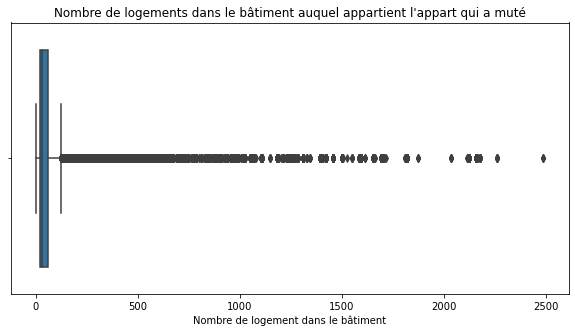

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_log"])
plt.title("Nombre de logements dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de logement dans le bâtiment");

In [100]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_garpark"=> (rnc) Nombre de lots de stationnement dans le bâtiment
df_selec["anarnc202012_nb_lot_garpark"].describe()


count   103078.000000
mean        35.389493
std        150.323691
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3513.000000
Name: anarnc202012_nb_lot_garpark, dtype: float64

In [101]:
df_selec[df_selec["anarnc202012_nb_lot_garpark"]==0].shape

(77597, 45)

In [102]:
# 80% des appts n'ont pas de parking ce qui ne me semble pas improbable dans Paris

In [103]:
df_selec["anarnc202012_nb_lot_garpark"].isna().sum()

0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


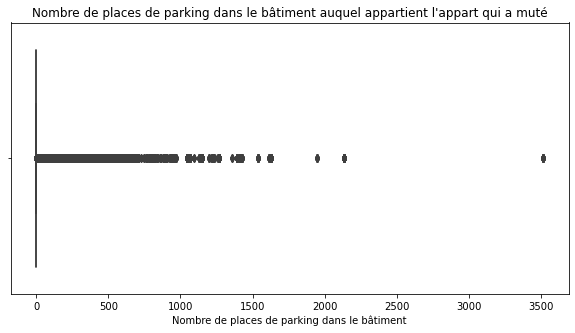

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_garpark"])
plt.title("Nombre de places de parking dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de places de parking dans le bâtiment");

In [105]:
df_selec[df_selec["anarnc202012_nb_lot_garpark"]>1500].shape

(148, 45)

In [106]:
# Suppression des valeurs aberrantes
df_selec=df_selec[(df_selec["anarnc202012_nb_lot_garpark"]<1500)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


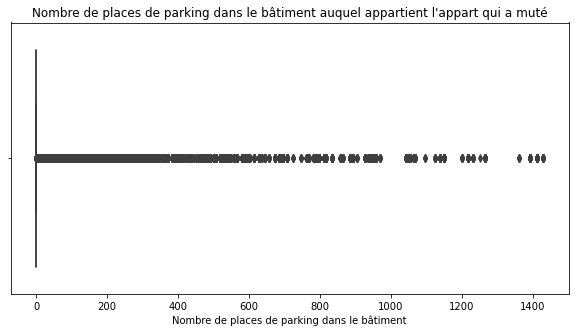

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_garpark"])
plt.title("Nombre de places de parking dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de places de parking dans le bâtiment");


In [108]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_tertiaire"=>(rnc) Nombre de lots de type bureau et commerce dans le bâtiment
df_selec["anarnc202012_nb_lot_tertiaire"].describe()

count   102930.000000
mean        72.023806
std        167.518387
min          0.000000
25%         14.000000
50%         28.000000
75%         56.000000
max       2464.000000
Name: anarnc202012_nb_lot_tertiaire, dtype: float64

In [109]:
df_selec["anarnc202012_nb_lot_tertiaire"].isna().sum()

0

In [110]:
df_selec[df_selec["anarnc202012_nb_lot_tertiaire"]==0].shape

(20192, 45)

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


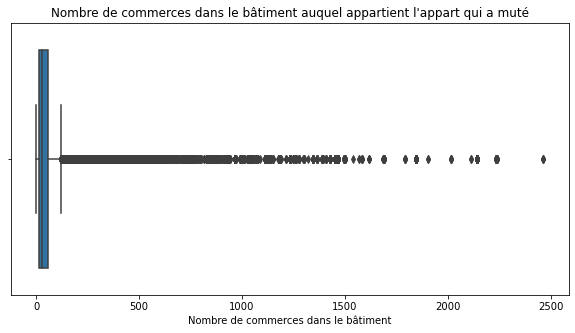

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_tertiaire"])
plt.title("Nombre de commerces dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de commerces dans le bâtiment");

In [112]:
df_selec[df_selec["anarnc202012_nb_lot_tertiaire"]>2000].shape

(69, 45)

In [113]:
# Suppression des valeurs aberrantes
df_selec=df_selec[(df_selec["anarnc202012_nb_lot_tertiaire"]<2000)]

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


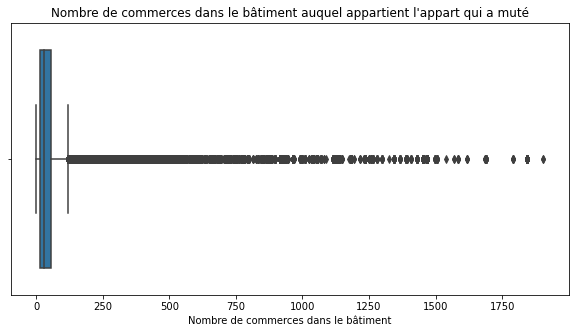

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_tertiaire"])
plt.title("Nombre de commerces dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre de commerces dans le bâtiment");

In [115]:
# ANALYSE DE LA VARIABLE  "anarnc202012_nb_lot_tot"=>(rnc) Nombre total de lots dans le bâtiment
df_selec["anarnc202012_nb_lot_tot"].describe()

count   102861.000000
mean       173.081196
std        421.345853
min          0.880000
25%         31.000000
50%         53.940000
75%        116.000000
max       7264.000000
Name: anarnc202012_nb_lot_tot, dtype: float64

In [116]:
df_selec["anarnc202012_nb_lot_tot"].isna().sum()

0

C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


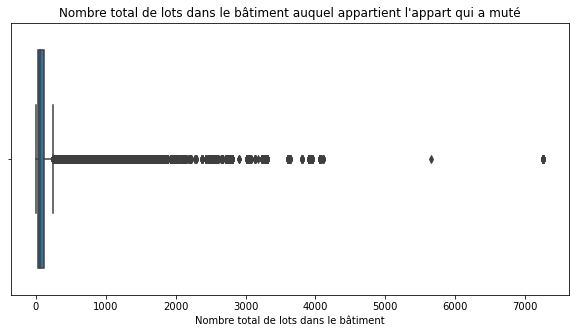

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_tot"])
plt.title("Nombre total de lots dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre total de lots dans le bâtiment");

In [118]:
df_selec[df_selec["anarnc202012_nb_lot_tot"]==0].shape

(0, 45)

In [119]:
df_selec[df_selec["anarnc202012_nb_lot_tot"]>3500].shape

(279, 45)

In [120]:
# Suppression des valeurs aberrantes
df_selec=df_selec[(df_selec["anarnc202012_nb_lot_tot"]>=1)&(df_selec["anarnc202012_nb_lot_tot"]<3500)]


C:\Users\Anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


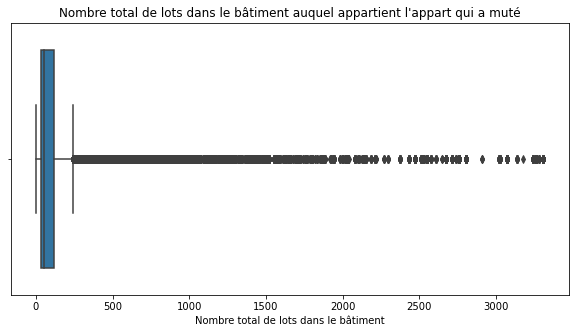

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(df_selec["anarnc202012_nb_lot_tot"])
plt.title("Nombre total de lots dans le bâtiment auquel appartient l'appart qui a muté")
plt.xlabel("Nombre total de lots dans le bâtiment");

In [122]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_baie_orientation"=>dpe) Orientations des vitrages d'un logement représentatif du bâtiment




In [123]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_baie_type_vitrage"=>dpe)  vitrages d'un logement représentatif du bâtiment
df_selec["adedpe202006_logtype_baie_type_vitrage"].value_counts(ascending=False)


double vitrage                      72296
simple vitrage                      24709
triple vitrage                        747
survitrage                            162
brique de verre ou polycarbonate       11
Name: adedpe202006_logtype_baie_type_vitrage, dtype: int64

In [124]:
df_selec["adedpe202006_logtype_baie_type_vitrage"].isna().sum()

4652

In [125]:
# remplacement des Nan par le mode
df_selec["adedpe202006_logtype_baie_type_vitrage"]=df_selec["adedpe202006_logtype_baie_type_vitrage"].fillna(df_selec["adedpe202006_logtype_baie_type_vitrage"].mode()[0])


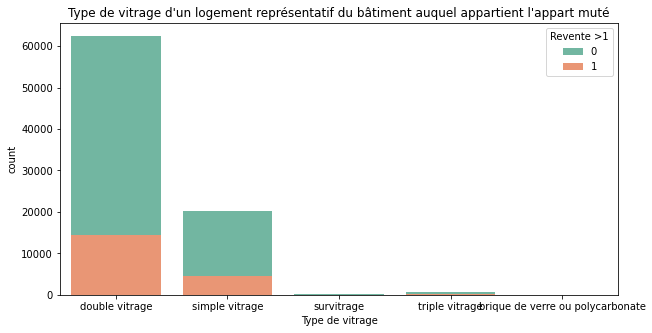

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_baie_type_vitrage', data=df_selec, hue="Revente >1", palette="Set2", dodge=False)
plt.title("Type de vitrage d'un logement représentatif du bâtiment auquel appartient l'appart muté")
plt.xlabel("Type de vitrage");

In [127]:
g=df_selec.groupby("adedpe202006_logtype_baie_type_vitrage").agg({"Revente >1":"mean"})
g


,Revente >1
adedpe202006_logtype_baie_type_vitrage,
brique de verre ou polycarbonate,0.363636
double vitrage,0.188530
simple vitrage,0.184103
survitrage,0.179012
triple vitrage,0.216867


In [128]:
list_baie=g.index.tolist()
x_ticks=np.arange(len(g))

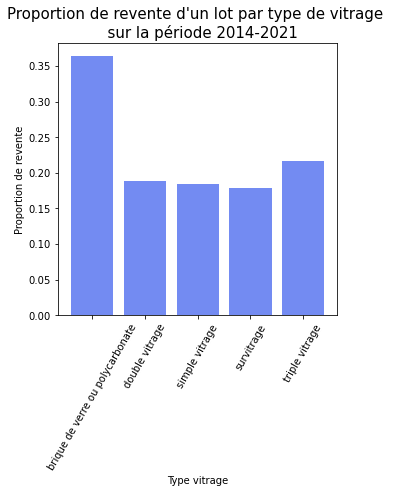

In [129]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#738bf2")
plt.xticks(x_ticks, list_baie, rotation=60)
plt.xlabel("Type vitrage")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par type de vitrage \n  sur la période 2014-2021", fontsize=15);

In [130]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ch_gen_lib_princ"=>(dpe) Type de générateur de chauffage principal du bâtiment
df_selec["adedpe202006_logtype_ch_gen_lib_princ"].value_counts(ascending=False)



generateurs a effet joule                          50472
chaudiere gaz standard                             30455
reseau de chaleur                                   5711
chaudiere gaz basse temperature                     3557
chaudiere gaz condensation                          2616
chaudiere fioul standard                            2319
chaudiere electrique                                 894
pac air/air                                          701
pac indetermine                                      446
chaudiere energie indetermine standard               258
radiateurs gaz                                       219
chaudiere energie indetermine indetermine            195
chaudiere fioul basse temperature                    140
autres                                                87
chauffage autre indetermine                           73
pac air/eau                                           66
chaudiere energie indetermine basse temperature       44
chaudiere fioul condensation   

In [131]:
df_selec["adedpe202006_logtype_ch_gen_lib_princ"].isna().sum()

4292

In [132]:
#remplacement des nan par le mode
df_selec["adedpe202006_logtype_ch_gen_lib_princ"]=df_selec["adedpe202006_logtype_ch_gen_lib_princ"].fillna(df_selec["adedpe202006_logtype_ch_gen_lib_princ"].mode()[0])

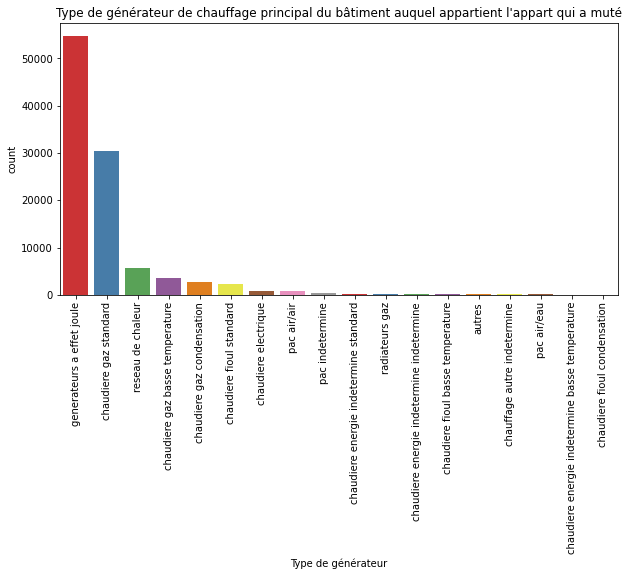

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ch_gen_lib_princ', data=df_selec, palette="Set1", order = df_selec['adedpe202006_logtype_ch_gen_lib_princ'].value_counts().index)
plt.title("Type de générateur de chauffage principal du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Type de générateur");

In [134]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_classe_conso_ener"=>
#(dpe) Classe de consommation énergie d'un logement représentatif du bâtiment ayant un DPE (méthode de l'ancien DPE pré réforme 2021)
df_selec["adedpe202006_logtype_classe_conso_ener"].value_counts(ascending=False)


E    29612
D    27133
F    16584
C     8141
G     8076
N     7589
B     1181
A      691
Name: adedpe202006_logtype_classe_conso_ener, dtype: int64

In [135]:
df_selec["adedpe202006_logtype_classe_conso_ener"].isna().sum()

3570

In [136]:
# Remplacement des Nan par le mode
df_selec["adedpe202006_logtype_classe_conso_ener"]=df_selec["adedpe202006_logtype_classe_conso_ener"].fillna(df_selec["adedpe202006_logtype_classe_conso_ener"].mode()[0])

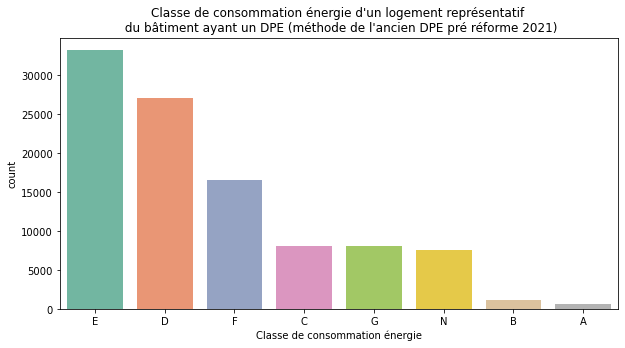

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_classe_conso_ener', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_classe_conso_ener'].value_counts().index)
plt.title("Classe de consommation énergie d'un logement représentatif \n du bâtiment ayant un DPE (méthode de l'ancien DPE pré réforme 2021)")
plt.xlabel("Classe de consommation énergie");

In [138]:
g=df_selec.groupby("adedpe202006_logtype_classe_conso_ener").agg({"Revente >1":"mean"})
g

,Revente >1
adedpe202006_logtype_classe_conso_ener,
A,0.202605
B,0.171041
C,0.181427
D,0.186452
E,0.184437
F,0.200736
G,0.193660
N,0.179207


In [139]:
list_conso=g.index.tolist()
x_ticks=np.arange(len(g))

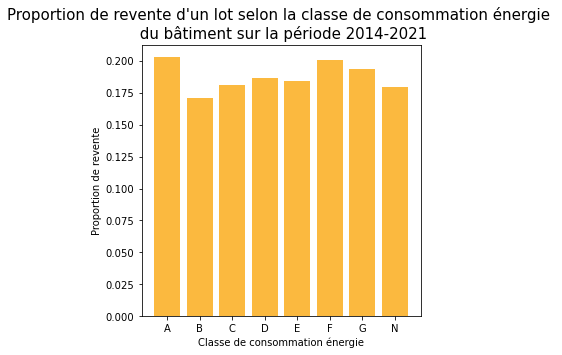

In [140]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#fbb93f")
plt.xticks(x_ticks, list_conso)
plt.xlabel("Classe de consommation énergie")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon la classe de consommation énergie \n du bâtiment sur la période 2014-2021", fontsize=15);

In [141]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_classe_estim_ges"=>
#(dpe) Classe de consommation GES DPE d'un logement représentatif du bâtiment ayant un DPE (méthode de l'ancien DPE pré réforme 2021)
#La classe GES figure sur l’étiquette climat d’un logement et permet de connaître la quantité de gaz à effet de serre émise par an.
df_selec["adedpe202006_logtype_classe_estim_ges"].value_counts(ascending=False)


C    21037
B    20028
E    18780
D    14211
F    10233
N     7589
A     3863
G     3266
Name: adedpe202006_logtype_classe_estim_ges, dtype: int64

In [142]:
# Irina : cherche lequel de ces 2 indices est concerné par la réforme

In [143]:
df_selec["adedpe202006_logtype_classe_estim_ges"].isna().sum()

3570

In [144]:
#Remplacement des nans par le mode
df_selec["adedpe202006_logtype_classe_estim_ges"]=df_selec["adedpe202006_logtype_classe_estim_ges"].fillna(df_selec["adedpe202006_logtype_classe_estim_ges"].mode()[0])

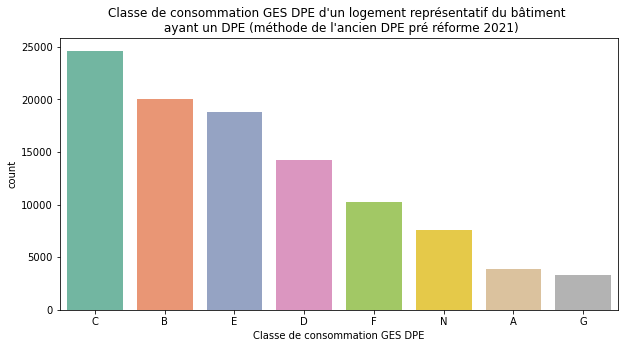

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_classe_estim_ges', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_classe_estim_ges'].value_counts().index)
plt.title("Classe de consommation GES DPE d'un logement représentatif du bâtiment \n ayant un DPE (méthode de l'ancien DPE pré réforme 2021)")
plt.xlabel("Classe de consommation GES DPE");

In [146]:
g=df_selec.groupby("adedpe202006_logtype_classe_estim_ges").agg({"Revente >1":"mean"})
g

,Revente >1
adedpe202006_logtype_classe_estim_ges,
A,0.185866
B,0.200669
C,0.185516
D,0.193019
E,0.178754
F,0.183035
G,0.188610
N,0.179207


In [147]:
list_ges=g.index.tolist()
x_ticks=np.arange(len(g))

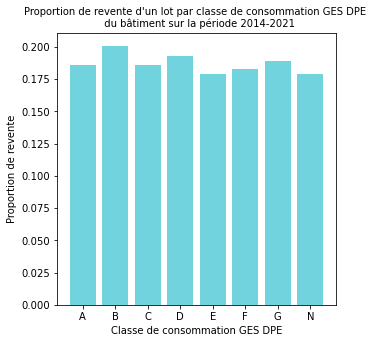

In [148]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_ges)
plt.xlabel("Classe de consommation GES DPE")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot par classe de consommation GES DPE \n  du bâtiment sur la période 2014-2021", fontsize=10);

In [149]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_traversant"=> (dpe) caractère traversant des logements du bâtiment
df_selec["adedpe202006_logtype_traversant"].value_counts(ascending=False)



non traversant                     70342
traversant nord sud (faible)        3231
traversant est ouest (faible)       2630
traversant tout venant (faible)     2125
traversant nord sud                 2047
traversant tout venant              2001
traversant est ouest                1869
traversant 90° (faible)              788
traversant 90°                       703
Name: adedpe202006_logtype_traversant, dtype: int64

In [150]:
df_selec["adedpe202006_logtype_traversant"].isna().sum()

16841

In [151]:
#Remplacement des nans par une classe inconnue
df_selec["adedpe202006_logtype_traversant"]=df_selec["adedpe202006_logtype_traversant"].fillna("Unknown")

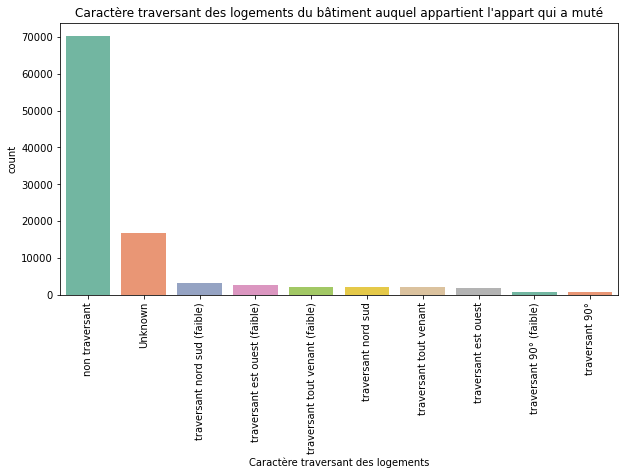

In [152]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_traversant', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_traversant'].value_counts().index)
plt.title("Caractère traversant des logements du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Caractère traversant des logements");

In [153]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ecs_type_ener"=> (dpe) Type d'énergie de eau chaude (concaténé + ) du bâtiment
df_selec["adedpe202006_logtype_ecs_type_ener"].value_counts(ascending=False)


electricite          55482
gaz                  34449
reseau de chaleur     4994
fioul                 1738
autres                 585
Name: adedpe202006_logtype_ecs_type_ener, dtype: int64

In [154]:
df_selec["adedpe202006_logtype_ecs_type_ener"].isna().sum()

5329

In [155]:
#Remplacement des nans par le mode
df_selec["adedpe202006_logtype_ecs_type_ener"]=df_selec["adedpe202006_logtype_ecs_type_ener"].fillna(df_selec["adedpe202006_logtype_ecs_type_ener"].mode()[0])

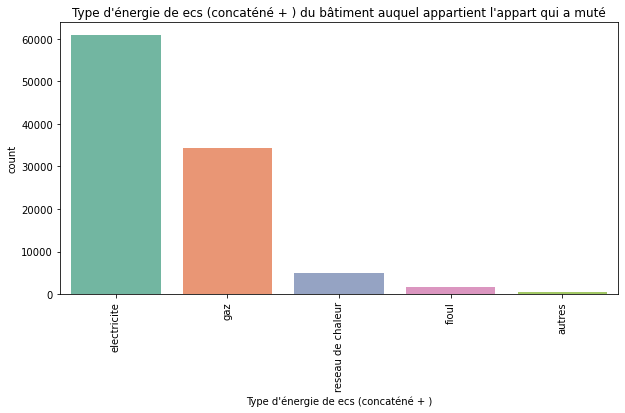

In [156]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ecs_type_ener', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_ecs_type_ener'].value_counts().index)
plt.title("Type d'énergie de ecs (concaténé + ) du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=90)
plt.xlabel("Type d'énergie de ecs (concaténé + )");

In [157]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_enr"=> Energies renouvelables présentes dans le bâtiment
df_selec["adedpe202006_logtype_enr"].value_counts(ascending=False)


0    102541
1        36
Name: adedpe202006_logtype_enr, dtype: int64

In [158]:
#Suppression de la variable
df_selec=df_selec.drop("adedpe202006_logtype_enr", axis=1)

In [159]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_perc_surf_vitree_ext"=> (dpe) Pourcentage de surface vitrée d'un logement du bâtiment
df_selec["adedpe202006_logtype_perc_surf_vitree_ext"].describe()


count   15801.000000
mean        0.279824
std         0.161936
min         0.000000
25%         0.153000
50%         0.258000
75%         0.369000
max         0.937000
Name: adedpe202006_logtype_perc_surf_vitree_ext, dtype: float64

In [160]:
df_selec["adedpe202006_logtype_perc_surf_vitree_ext"].isna().sum()

86776

In [161]:
#Suppression de cette variable compte tenu du nombre de nan
df_selec=df_selec.drop("adedpe202006_logtype_perc_surf_vitree_ext", axis=1)

In [162]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_ph_pos_isol"=> (dpe) Type d'isolation de la toiture du bâtiment
df_selec["adedpe202006_logtype_ph_pos_isol"].value_counts(ascending=False)

non isole    57936
ITI          15785
ITE            450
isole          183
ITE+ITI         35
Name: adedpe202006_logtype_ph_pos_isol, dtype: int64

In [163]:
df_selec["adedpe202006_logtype_ph_pos_isol"].isna().sum()

28188

In [164]:
#Remplacement des nans par une classe inconnue
df_selec["adedpe202006_logtype_ph_pos_isol"]=df_selec["adedpe202006_logtype_ph_pos_isol"].fillna("Unknown")

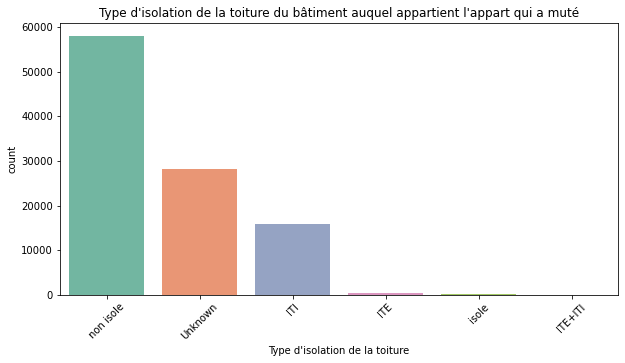

In [165]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_ph_pos_isol', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_ph_pos_isol'].value_counts().index)
plt.title("Type d'isolation de la toiture du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Type d'isolation de la toiture");

In [166]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_presence_balcon"=> (dpe) présence de balcons dans les logements du bâtiment
df_selec["adedpe202006_logtype_presence_balcon"].value_counts(ascending=False)

0.000000    16071
1.000000     1201
Name: adedpe202006_logtype_presence_balcon, dtype: int64

In [167]:
df_selec["adedpe202006_logtype_presence_balcon"].isna().sum()

85305

In [168]:
# Trop de Nan => suppression de la variable
df_selec=df_selec.drop("adedpe202006_logtype_presence_balcon", axis=1)

In [169]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_presence_climatisation"=> (dpe) Booléen présence de climatisation dans le bâtiment
df_selec["adedpe202006_logtype_presence_climatisation"].value_counts(ascending=False)


0.000000    97525
1.000000     1482
Name: adedpe202006_logtype_presence_climatisation, dtype: int64

In [170]:
df_selec["adedpe202006_logtype_presence_climatisation"].isna().sum()

3570

In [171]:
#Remplacement des nan par le mode le plus fréquent
df_selec["adedpe202006_logtype_presence_climatisation"]=df_selec["adedpe202006_logtype_presence_climatisation"].fillna(df_selec["adedpe202006_logtype_presence_climatisation"].mode()[0])


In [172]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_type_batiment"=> Type de construction (batiment)
df_selec["adedpe202006_logtype_type_batiment"].value_counts(ascending=False)

Appartement             89852
Non résidentiel          4046
Maison                   3792
Logements collectifs     1220
Centres commerciaux        97
Name: adedpe202006_logtype_type_batiment, dtype: int64

In [173]:
df_selec["adedpe202006_logtype_type_batiment"].isna().sum()

3570

In [174]:
#Remplacement des nans par le mode le plus fréquent
df_selec["adedpe202006_logtype_type_batiment"]=df_selec["adedpe202006_logtype_type_batiment"].fillna(df_selec["adedpe202006_logtype_type_batiment"].mode()[0])

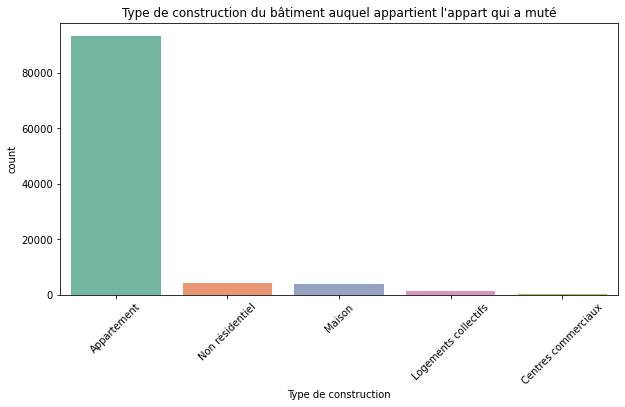

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(x='adedpe202006_logtype_type_batiment', data=df_selec, palette="Set2", order = df_selec['adedpe202006_logtype_type_batiment'].value_counts().index)
plt.title("Type de construction du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Type de construction");

In [176]:
# ANALYSE DE LA VARIABLE  "ancqpv201410_is_qpv"=> (qpv) Est-ce que le bâtiment est dans un quartier prioritaire de la ville ?
df_selec["ancqpv201410_is_qpv"].value_counts(ascending=False)



0.000000    99214
1.000000     3173
Name: ancqpv201410_is_qpv, dtype: int64

In [177]:
df_selec["ancqpv201410_is_qpv"].isna().sum()

190

In [178]:
#remplacement des nans par l'occurence la plus fréquente
df_selec["ancqpv201410_is_qpv"]=df_selec["ancqpv201410_is_qpv"].fillna(df_selec["ancqpv201410_is_qpv"].mode()[0])


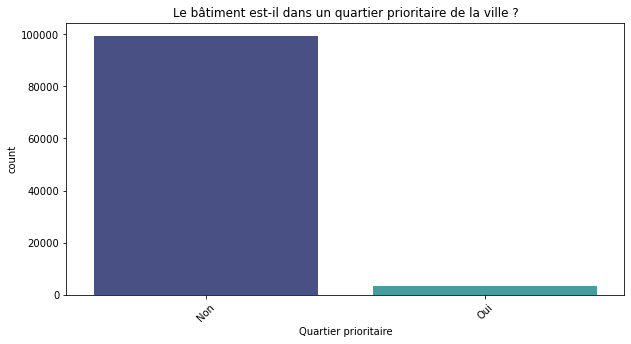

In [179]:
plt.figure(figsize=(10,5))
sns.countplot(x='ancqpv201410_is_qpv', data=df_selec, palette="mako", order = df_selec['ancqpv201410_is_qpv'].value_counts().index)
plt.title("Le bâtiment est-il dans un quartier prioritaire de la ville ?")
plt.xticks ([0,1], ["Non", "Oui"])
plt.xticks(rotation=45)
plt.xlabel("Quartier prioritaire");



In [180]:
# ANALYSE DE LA VARIABLE  "cerffo2020_annee_construction"=> Année de construction du bâtiment
df_selec["cerffo2020_annee_construction"].value_counts(ascending=False)


<1948        75935
1949-1970     8552
1970-1988     4063
1989-1999     2122
2000-2005     1741
>2012          728
2005-2012      411
Name: cerffo2020_annee_construction, dtype: int64

In [181]:
df_selec["cerffo2020_annee_construction"].isna().sum()

9025

In [182]:
#remplacement des nans par le mode le plus fréquent
df_selec["cerffo2020_annee_construction"]=df_selec["cerffo2020_annee_construction"].fillna(df_selec["cerffo2020_annee_construction"].mode()[0])

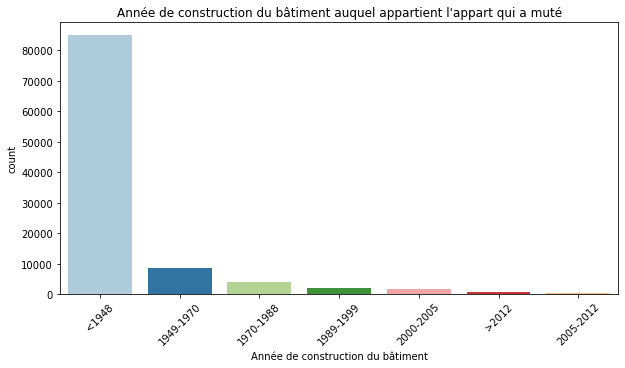

In [183]:
plt.figure(figsize=(10,5))
sns.countplot(x='cerffo2020_annee_construction', data=df_selec, palette="Paired", order = df_selec['cerffo2020_annee_construction'].value_counts().index)
plt.title("Année de construction du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Année de construction du bâtiment");

In [184]:
g=df_selec.groupby("cerffo2020_annee_construction").agg({"Revente >1":"mean"})
g

,Revente >1
cerffo2020_annee_construction,
1949-1970,0.175047
1970-1988,0.144967
1989-1999,0.161169
2000-2005,0.191269
2005-2012,0.180049
<1948,0.191902
>2012,0.153846


In [185]:
list_année_cons=g.index.tolist()
x_ticks=np.arange(len(g))

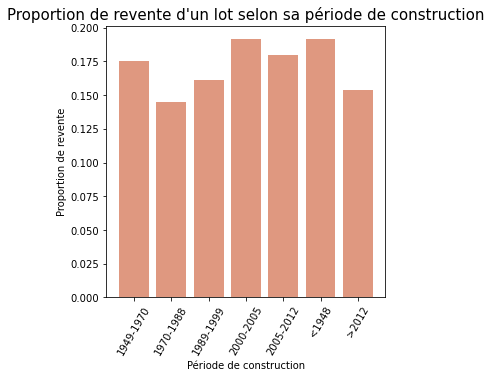

In [186]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#df9880")
plt.xticks(x_ticks, list_année_cons, rotation=60)
plt.xlabel("Période de construction")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa période de construction", fontsize=15);



In [187]:
# revente + importante sur la période 2005-2012 => effet dispositif défisc ???

In [188]:
# ANALYSE DE LA VARIABLE  "cerffo2020_usage_niveau_1_txt"=> (cstb) indicateurs d'usage simplifié du bâtiment (verbose)
df_selec["cerffo2020_usage_niveau_1_txt"].value_counts(ascending=False)


Résidentiel collectif     100121
Tertiaire & Autres          2158
Résidentiel individuel       279
Autres                        19
Name: cerffo2020_usage_niveau_1_txt, dtype: int64

In [189]:
df_selec["cerffo2020_usage_niveau_1_txt"].isna().sum()

0

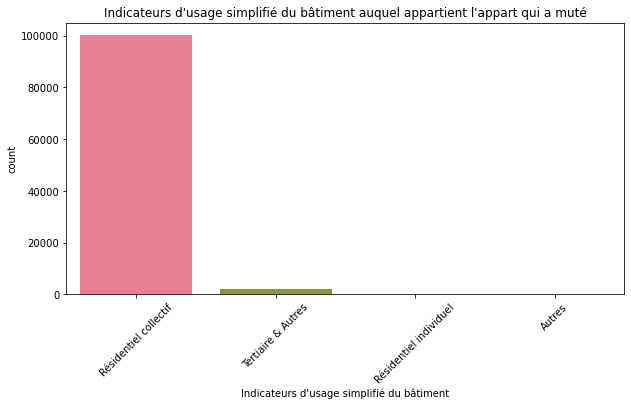

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(x='cerffo2020_usage_niveau_1_txt', data=df_selec, palette="husl", order = df_selec['cerffo2020_usage_niveau_1_txt'].value_counts().index)
plt.title("Indicateurs d'usage simplifié du bâtiment auquel appartient l'appart qui a muté")
plt.xticks(rotation=45)
plt.xlabel("Indicateurs d'usage simplifié du bâtiment");

In [191]:
# ANALYSE DE LA VARIABLE  "cerffo2020_nb_log"=> (ffo) Nombre de logements dans le bâtiment


In [192]:
df_selec["cerffo2020_nb_log"].describe()

count   102577.000000
mean        44.403375
std         68.128363
min          0.000000
25%         16.000000
50%         25.000000
75%         44.000000
max        964.000000
Name: cerffo2020_nb_log, dtype: float64

In [193]:
df_selec.groupby("cerffo2020_annee_construction").agg({"cerffo2020_nb_log" :'mean'})

,cerffo2020_nb_log
cerffo2020_annee_construction,
1949-1970,94.914406
1970-1988,126.505046
1989-1999,61.851555
2000-2005,55.993682
2005-2012,42.321168
<1948,34.526095
>2012,68.134615


<Figure size 1080x1080 with 0 Axes>

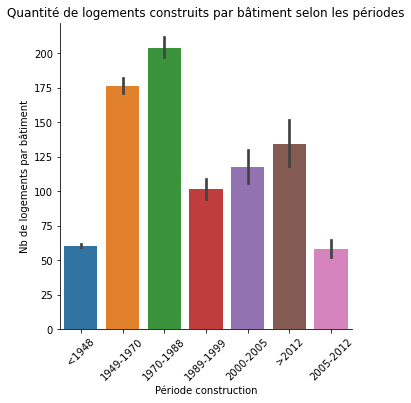

In [194]:
# Nb de logements construits par bâtiment, selon les périodes

plt.figure(figsize=(15,15))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'anarnc202012_nb_log', kind="bar", data = df_selec, order=df_selec["cerffo2020_annee_construction"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Période construction')
plt.ylabel('Nb de logements par bâtiment')
plt.title('Quantité de logements construits par bâtiment selon les périodes');

In [195]:
# ANALYSE DE LA VARIABLE  "georad2020_alea"=> (radon) Niveau de risque radon
df_selec["georad2020_alea"].value_counts(ascending=False)

Faible    102387
Name: georad2020_alea, dtype: int64

In [196]:
df_selec["georad2020_alea"].isna().sum()

190

In [197]:
#Pas d'intérêt. Suppression
df_selec=df_selec.drop("georad2020_alea", axis=1)

In [198]:
# ANALYSE DE LA VARIABLE  "igntop202103_bat_hauteur"=> (ign) Hauteur du bâtiment [m]
df_selec["igntop202103_bat_hauteur"].describe()

count   102374.000000
mean        20.712193
std          7.635424
min          0.000000
25%         17.200000
50%         20.100000
75%         23.000000
max        104.000000
Name: igntop202103_bat_hauteur, dtype: float64

In [199]:
df_selec["igntop202103_bat_hauteur"].isna().sum()

203

In [200]:
#Remplacement des Nan par la médiane
df_selec["igntop202103_bat_hauteur"]=df_selec["igntop202103_bat_hauteur"].fillna(df_selec["igntop202103_bat_hauteur"].median())

<Figure size 1080x1080 with 0 Axes>

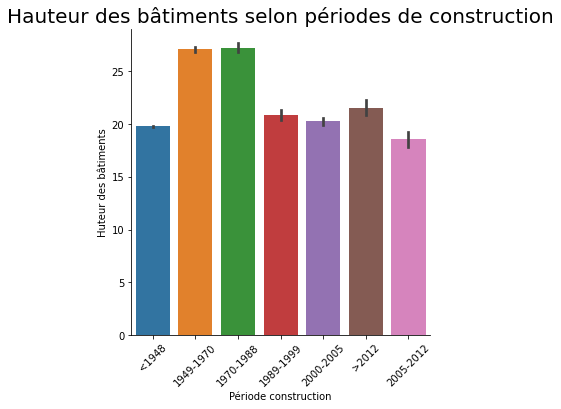

In [201]:
# Hauteur des bâtiments construits selon les périodes

plt.figure(figsize=(15,15))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'igntop202103_bat_hauteur', kind="bar", data = df_selec, order=df_selec["cerffo2020_annee_construction"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Période construction')
plt.ylabel('Huteur des bâtiments')
plt.title('Hauteur des bâtiments selon périodes de construction', fontsize=20);

In [202]:
# ANALYSE DE LA VARIABLE  "mcumer202007_is_mer"=> 
#(merimee) Le bâtiment est situé dans un périmètre ABF monument historique ? (<= 500 m)
df_selec["mcumer202007_is_mer"].value_counts(ascending=False)


1.000000    97090
0.000000     5297
Name: mcumer202007_is_mer, dtype: int64

In [203]:
df_selec["mcumer202007_is_mer"].isna().sum()

190

In [204]:
#remplacement des Nan par la médiane
df_selec["mcumer202007_is_mer"]=df_selec["mcumer202007_is_mer"].fillna(df_selec["mcumer202007_is_mer"].median())

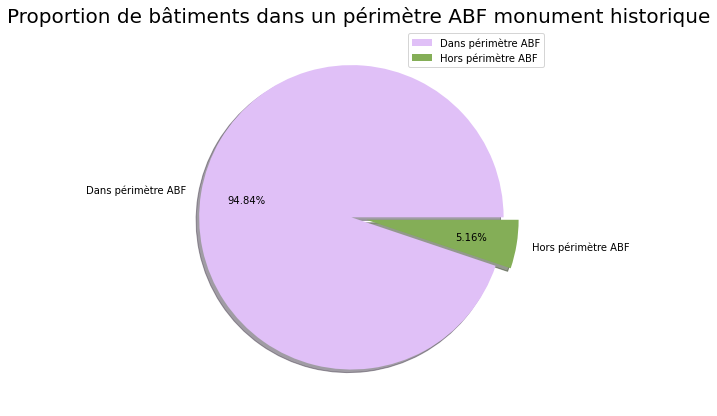

In [205]:
plt.figure(figsize=(7,7))
x=df_selec["mcumer202007_is_mer"].value_counts()

plt.pie(x, labels=["Dans périmètre ABF", "Hors périmètre ABF"], 
        colors=["#e0c0f7", "#84ae57"], 
        explode=[0.05,0.05],
        autopct=lambda x : str(round(x,2))+ "%", 
        pctdistance=0.7, 
        shadow=True)
plt.title("Proportion de bâtiments dans un périmètre ABF monument historique", fontsize=20)
plt.legend(loc="best");

In [206]:
# ANALYSE DE LA VARIABLE  "adedpe202006_logtype_s_hab"=> (dpe) Surface habitable du DPE
df_selec["adedpe202006_logtype_s_hab"].describe()

count   98856.000000
mean       74.004876
std       365.980788
min         0.000000
25%        30.000000
50%        43.000000
75%        62.000000
max     15999.000000
Name: adedpe202006_logtype_s_hab, dtype: float64

In [207]:
df_selec["adedpe202006_logtype_s_hab"].isna().sum()

3721

In [208]:
#On a déjà 2 variables d'indication de surface. suppression de celle-ci
df_selec=df_selec.drop("adedpe202006_logtype_s_hab", axis=1)


In [209]:
df_selec["Commerces_bruyants"].unique()

array([1, 0, 2, 3], dtype=int64)

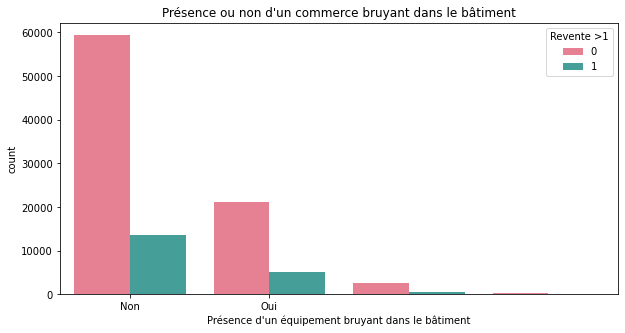

In [210]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Commerces_bruyants', hue = "Revente >1", data = df_selec, palette="husl");
plt.title("Présence ou non d'un commerce bruyant dans le bâtiment")
plt.xticks ([0,1], ["Non", "Oui"])
plt.xlabel("Présence d'un équipement bruyant dans le bâtiment");

In [211]:
g=df_selec.groupby("Commerces_bruyants").agg({"Revente >1":"mean"})
g

,Revente >1
Commerces_bruyants,
0,0.185958
1,0.192561
2,0.189373
3,0.166667


In [212]:
list_equip=g.index.tolist()
x_ticks=np.arange(len(g))

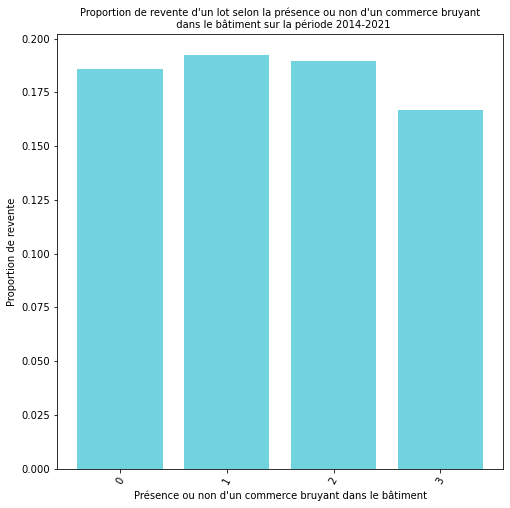

In [213]:
plt.figure(figsize=(8,8))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#71d3de")
plt.xticks(x_ticks, list_equip, rotation=60)
plt.xlabel("Présence ou non d'un commerce bruyant dans le bâtiment")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon la présence ou non d'un commerce bruyant\n  dans le bâtiment sur la période 2014-2021", fontsize=10);

In [214]:
df_selec["qty_of_mut"].unique()

array([1, 2, 3, 4], dtype=int64)

In [215]:
df_selec["qty_of_mut"].value_counts()

1    83326
2    17990
3     1217
4       44
Name: qty_of_mut, dtype: int64

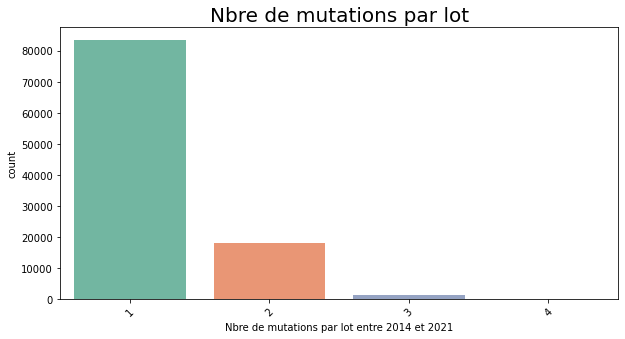

In [216]:
plt.figure(figsize=(10,5))

sns.countplot(x='qty_of_mut', data=df_selec, palette="Set2")
plt.title("Nbre de mutations par lot", fontsize=20)
plt.xlabel("Nbre de mutations par lot entre 2014 et 2021")

plt.xticks(rotation=45);

In [217]:
df_selec["anneemut"].value_counts(ascending=True).index

Int64Index([2014, 2020, 2021, 2016, 2015, 2018, 2019, 2017], dtype='int64')

In [218]:
df_selec["datemut"]

idmutation
7819809    2021-06-04
7819821    2021-03-18
7819822    2021-11-12
7819824    2021-01-08
8563148    2016-09-09
              ...    
8843159    2014-07-30
8843161    2014-01-30
8843163    2014-05-02
8843166    2014-12-11
8843172    2014-04-22
Name: datemut, Length: 102577, dtype: object

In [219]:
df_selec["anneemut"].value_counts()
#Trier par ordre année

2017    14675
2019    14070
2018    13514
2015    13092
2016    12655
2021    12528
2020    11300
2014    10743
Name: anneemut, dtype: int64

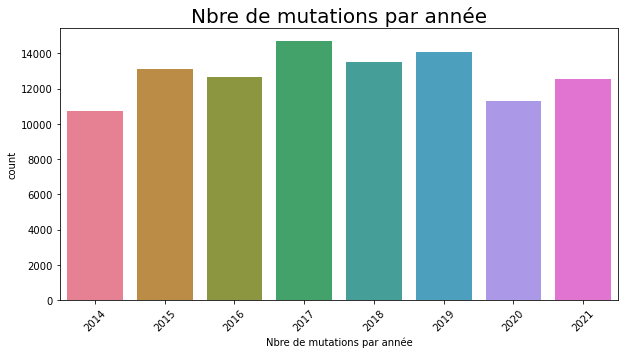

In [220]:
plt.figure(figsize=(10,5))

sns.countplot(x='anneemut', data=df_selec, palette="husl")
plt.title("Nbre de mutations par année", fontsize=20)
plt.xlabel("Nbre de mutations par année")

plt.xticks(rotation=45);

<Figure size 720x720 with 0 Axes>

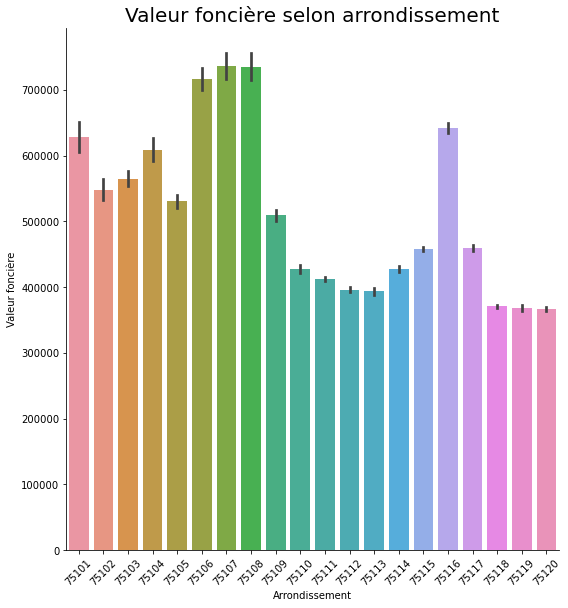

In [221]:
#Valeur en fonction de l'arrondissement
plt.figure(figsize=(10,10))
sns.catplot(x = 'l_codinsee', y = 'valeurfonc', kind="bar", height=8, data = df_selec)
plt.xticks(rotation=45)
plt.xlabel('Arrondissement')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon arrondissement', fontsize=20);
       

<Figure size 576x576 with 0 Axes>

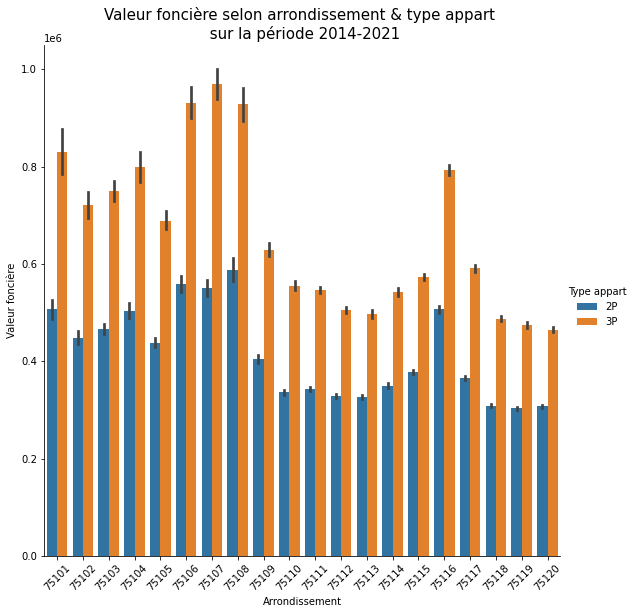

In [222]:
#Valeur en fonction de l'arrondissement
plt.figure(figsize=(8,8))
sns.catplot(x = 'l_codinsee', y = 'valeurfonc', kind="bar", hue = "Type appart", height=8, data = df_selec)
plt.xticks(rotation=45)
plt.xlabel('Arrondissement')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon arrondissement & type appart \n sur la période 2014-2021', fontsize=15);
            


In [223]:
# Rappel des Best params de Decision Tree et Random Forest

#sapt2pp
#libnatmut
#adedpe202006_logtype_classe_conso_ener
#adedpe202006_logtype_ch_gen_lib_princ
#adedpe202006_logtype_traversant
#anarnc202012_nb_lot_garpark
#nbapt2pp
#nbapt3pp
#nblot


<Figure size 360x360 with 0 Axes>

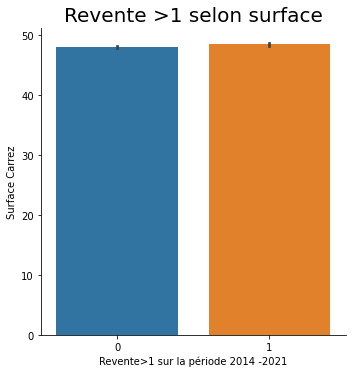

In [224]:
# Revente selon surface Carrez
plt.figure(figsize=(5,5))
sns.catplot(x = 'Revente >1', y = 'scarrez', kind="bar", data = df_selec)
plt.xlabel('Revente>1 sur la période 2014 -2021')
plt.ylabel('Surface Carrez')
plt.title('Revente >1 selon surface', fontsize=20);

In [225]:
# Faire des catégories de surface et regrader la proportion de vendu ou pas pour chaque catégorie

df_selec["scarrez"].describe()

count   102577.000000
mean        48.167405
std         19.225184
min          0.300000
25%         34.290000
50%         45.120000
75%         58.630000
max        215.000000
Name: scarrez, dtype: float64

In [226]:
df_selec["cat_scarrez"]=pd.cut(df_selec["scarrez"], 
bins=[0, 35, 47, 60,215], 
labels=["<35 m²", "Entre 35 & 47 m²", "Entre 47 & 60m²", ">60m²"])

In [227]:
g=df_selec.groupby("cat_scarrez").agg({"Revente >1":"mean"})
g

,Revente >1
cat_scarrez,
<35 m²,0.167803
Entre 35 & 47 m²,0.189512
Entre 47 & 60m²,0.210688
>60m²,0.185578


In [228]:
list_scarrez=g.index.tolist()
x_ticks=np.arange(len(g))

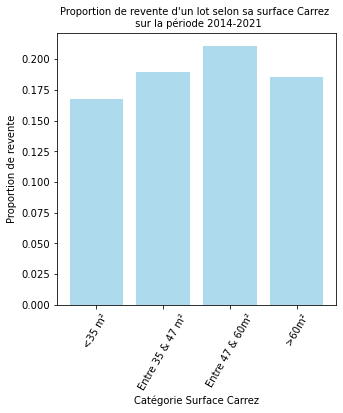

In [229]:
plt.figure(figsize=(5,5))
plt.bar(range(len(g)), g["Revente >1"], linewidth=5, color="#aedaed")
plt.xticks(x_ticks, list_scarrez, rotation=60)
plt.xlabel("Catégorie Surface Carrez")
plt.ylabel("Proportion de revente")
plt.title("Proportion de revente d'un lot selon sa surface Carrez \n sur la période 2014-2021", fontsize=10);

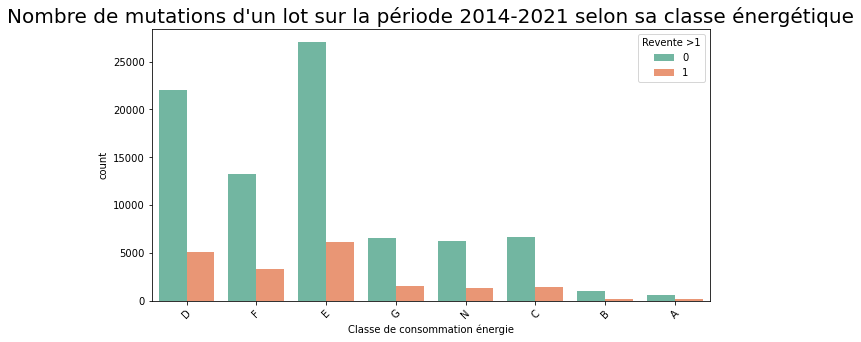

In [230]:
plt.figure(figsize=(10,5))

sns.countplot(x='adedpe202006_logtype_classe_conso_ener', hue="Revente >1", data=df_selec, palette="Set2")
plt.title("Nombre de mutations d'un lot sur la période 2014-2021 selon sa classe énergétique", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation énergie');

# Attention : en orange, on va avoir plusieurs fois le même appartement pq il a muté plusieurs fois. 
# Pas faux mais il faut l'avoir en tête pour lecture de ce graph 

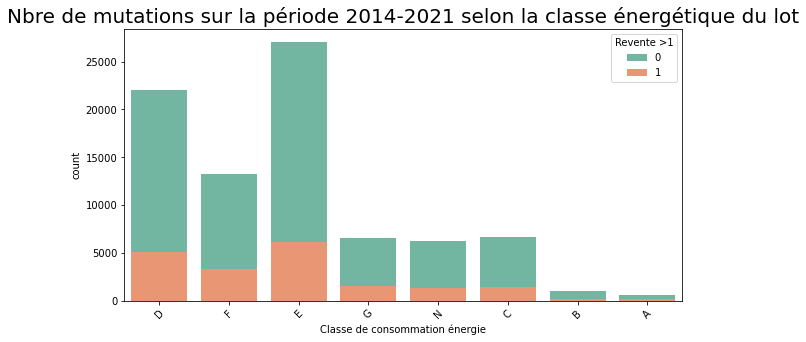

In [231]:
plt.figure(figsize=(10,5))

sns.countplot(x='adedpe202006_logtype_classe_conso_ener', hue="Revente >1", data=df_selec, palette="Set2", dodge=False)
plt.title("Nbre de mutations sur la période 2014-2021 selon la classe énergétique du lot", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation énergie');

<Figure size 1080x1080 with 0 Axes>

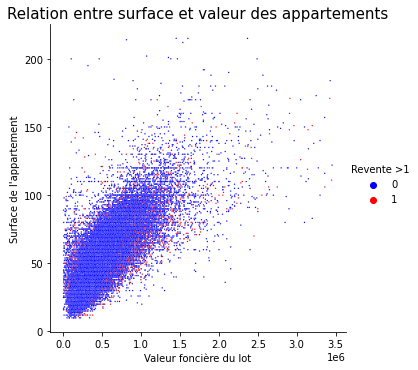

In [232]:
#Relation entre valeur foncière et surface
plt.figure(figsize=(15,15))
sns.relplot(x="valeurfonc", y="surface_appart", hue="Revente >1", data=df_selec, s=2, palette=["b", "r"]);
plt.xlabel("Valeur foncière du lot")
plt.ylabel("Surface de l'appartement")
plt.title("Relation entre surface et valeur des appartements", fontsize=15);

In [233]:
# trouver comment faire pour que quand bcp de points au même endroit ca fasse un gros point (weight-density ???)

<Figure size 576x576 with 0 Axes>

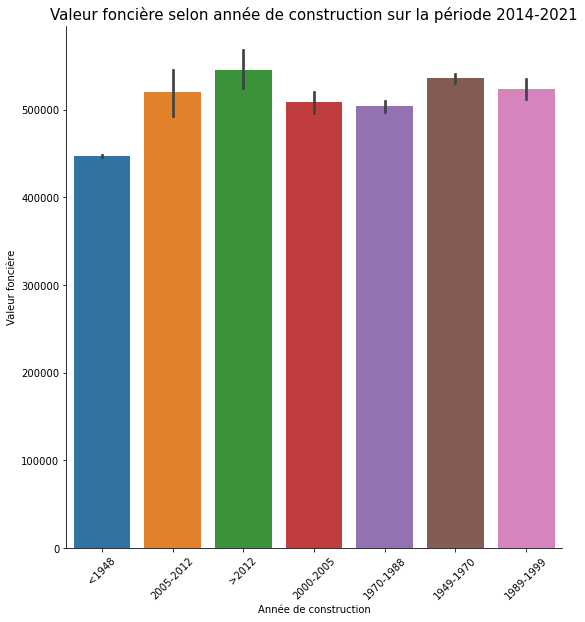

In [234]:
# Valeur foncière selon année de construction 

plt.figure(figsize=(8,8))
sns.catplot(x = 'cerffo2020_annee_construction', y = 'valeurfonc', kind="bar", height=8, data = df_selec)
plt.xticks(rotation=45)
plt.xlabel('Année de construction')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon année de construction sur la période 2014-2021', fontsize=15);

<Figure size 576x576 with 0 Axes>

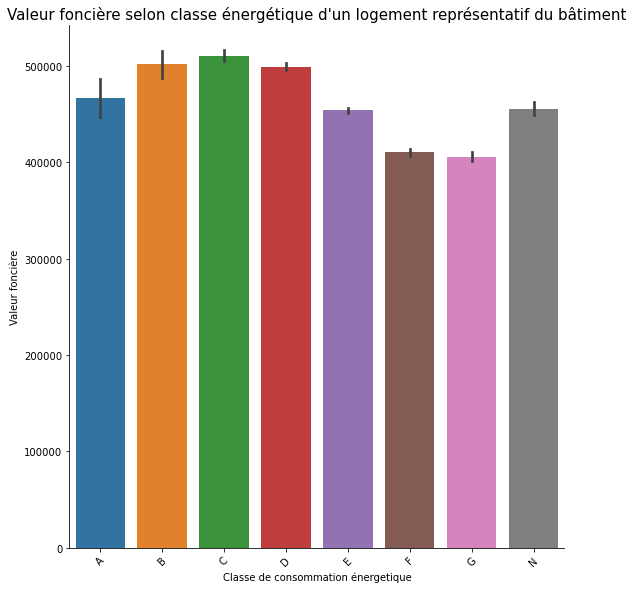

In [235]:
#Valeur foncière selon classe énergétique

plt.figure(figsize=(8,8))
sns.catplot(x = 'adedpe202006_logtype_classe_conso_ener', 
            y = 'valeurfonc', 
            kind="bar", 
            height=8, 
            data = df_selec, 
            order=df_selec["adedpe202006_logtype_classe_conso_ener"].value_counts().index.sort_values())
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation énergetique')
plt.ylabel('Valeur foncière')
plt.title("Valeur foncière selon classe énergétique d'un logement représentatif du bâtiment", fontsize=15);

<Figure size 576x576 with 0 Axes>

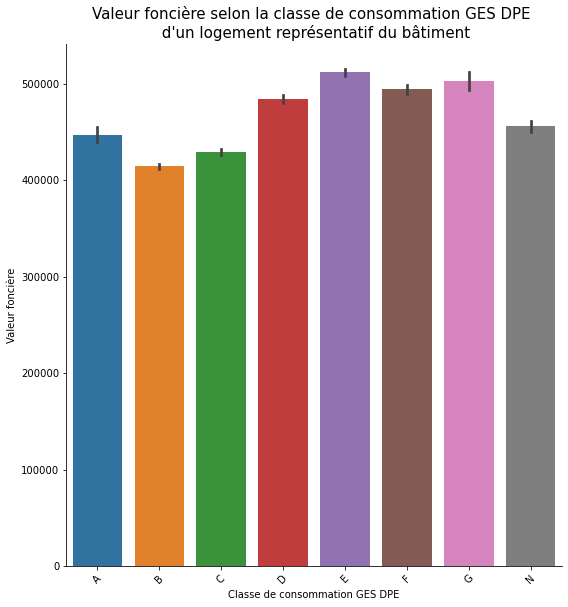

In [236]:
#Valeur foncière selon la Classe de consommation GES DPE d'un logement représentatif du bâtiment
plt.figure(figsize=(8,8))
sns.catplot(x = 'adedpe202006_logtype_classe_estim_ges', 
            y = 'valeurfonc', 
            kind="bar", 
            height=8, 
            data = df_selec, 
            order=df_selec["adedpe202006_logtype_classe_estim_ges"].value_counts().index.sort_values())
plt.xticks(rotation=45)
plt.xlabel('Classe de consommation GES DPE')
plt.ylabel('Valeur foncière')
plt.title("Valeur foncière selon la classe de consommation GES DPE \n d'un logement représentatif du bâtiment", fontsize=15);


<Figure size 1080x1080 with 0 Axes>

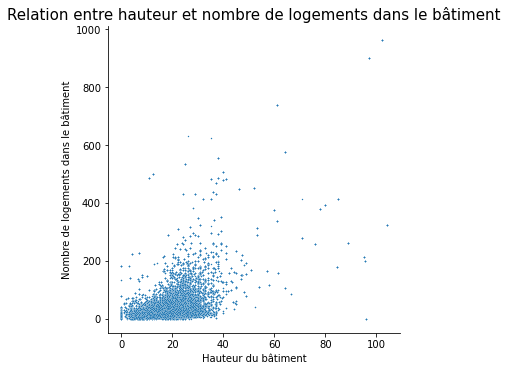

In [237]:
#Relation entre hauteur et nombre de logements dans le bâtiment

plt.figure(figsize=(15,15))
sns.relplot(x="igntop202103_bat_hauteur", y="cerffo2020_nb_log", data=df_selec, s=2, palette=["b", "r"]);
plt.xlabel("Hauteur du bâtiment")
plt.ylabel("Nombre de logements dans le bâtiment")
plt.title("Relation entre hauteur et nombre de logements dans le bâtiment", fontsize=15);

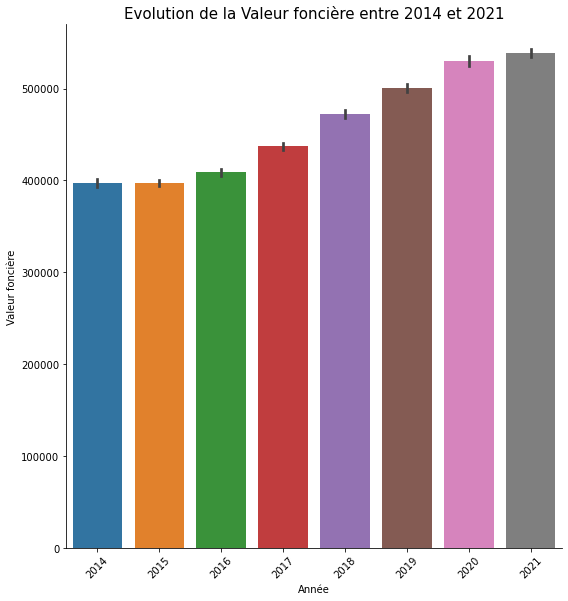

In [238]:
# Valeur foncière moyen par année de transaction
sns.catplot(x = 'anneemut', 
            y = 'valeurfonc', 
            kind="bar", 
            height=8, 
            data = df_selec)
            
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Valeur foncière')
plt.title("Evolution de la Valeur foncière entre 2014 et 2021", fontsize=15);


In [239]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102577 entries, 7819809 to 8843172
Data columns (total 41 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Revente >1                                   102577 non-null  int64   
 1   libnatmut                                    102577 non-null  object  
 2   valeurfonc                                   102577 non-null  float64 
 3   nblot                                        102577 non-null  object  
 4   l_codinsee                                   102577 non-null  int64   
 5   nblocdep                                     102577 non-null  int64   
 6   Type appart                                  102577 non-null  object  
 7   scarrez                                      102577 non-null  float64 
 8   anarnc202012_nb_log                          102577 non-null  float64 
 9   anarnc202012_nb_lot_garpark              

In [240]:
df=df_selec

In [241]:
df.to_csv(r"C:\Users\Anne\Projet Bâtiment\210622\df.csv", index=False)

##### df.to_csv(r"C:\Users\Anne\Projet Bâtiment\210622\df.csv", index=False)